In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mat2list import EEG

import scipy

import mne

In [2]:
data = scipy.io.loadmat("sampleEEGdata.mat")
eeg = EEG(data)

In [3]:
time2plot = np.arange(-200,850,50)

tidx = np.zeros(len(time2plot))
for idx in range(len(time2plot)):
    tidx[idx] = np.argmin(np.abs(eeg.eegtimes - time2plot[idx]))


In [4]:
def topo_plot2(eegclass, time2plot, ax):
    head_rad = 0.095
    plot_rad = 0.51
    squeezefac = head_rad / plot_rad

    eeg_chanlocs = []
    for i in range(64):  
        th = eegclass.theta[i]
        rd = eegclass.radius[i]

        theta_rad = np.deg2rad(th)
        x = rd * np.cos(theta_rad)
        y = rd * np.sin(theta_rad)
        eeg_chanlocs.append([y*squeezefac, x*squeezefac])

    eeg_chanlocs = np.array(eeg_chanlocs)

    erp = np.mean(eegclass.eegdata, axis=2)  
    im, _ = mne.viz.plot_topomap(erp[:, time2plot], eeg_chanlocs, axes=ax, show=False,
                                 cmap="coolwarm", ch_type="eeg", size=200, contours=6,
                                 vlim=(-5, 5))
    ax.set_title('{} ms'.format(eegclass.eegtimes[:, time2plot]), fontsize=10)
    return im  
   


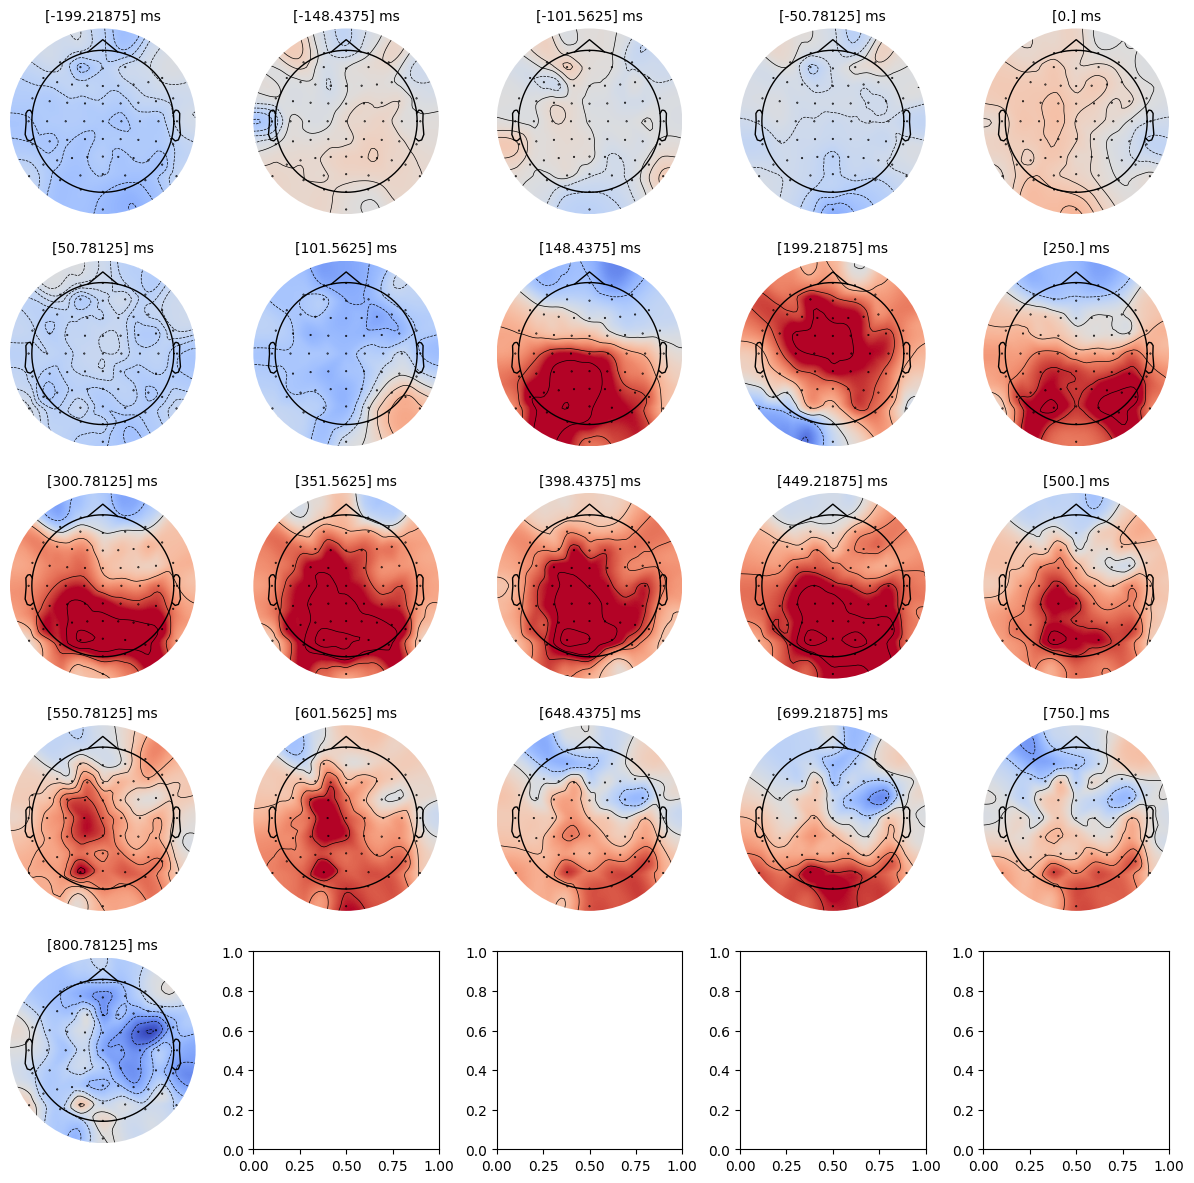

In [5]:
fig, ax = plt.subplots(5, 5, figsize=(12, 12)) 
ax = ax.flatten()  

for i in range(len(time2plot)):
    topo_plot2(eeg, int(tidx[i]), ax[i]) 

plt.tight_layout() 
plt.show()

In [29]:
def topo_plot3(eegclass, start, end, ax):
    head_rad = 0.095
    plot_rad = 0.51
    squeezefac = head_rad / plot_rad

    if end > 640:
        end = 640
    eeg_chanlocs = []
    for i in range(64):  
        th = eegclass.theta[i]
        rd = eegclass.radius[i]

        theta_rad = np.deg2rad(th)
        x = rd * np.cos(theta_rad)
        y = rd * np.sin(theta_rad)
        eeg_chanlocs.append([y*squeezefac, x*squeezefac])

    eeg_chanlocs = np.array(eeg_chanlocs)

    erp = np.mean(eegclass.eegdata, axis=2)  
    im, _ = mne.viz.plot_topomap(np.mean(erp[:, start:end], axis=1), eeg_chanlocs, axes=ax, show=False,
                                 cmap="coolwarm", ch_type="eeg", size=200, contours=0,
                                 vlim=(-5, 5))
    ax.set_title('{} ms'.format((eeg.eegtimes[:,start] + eeg.eegtimes[:,end])/2), fontsize=10)
    return im  

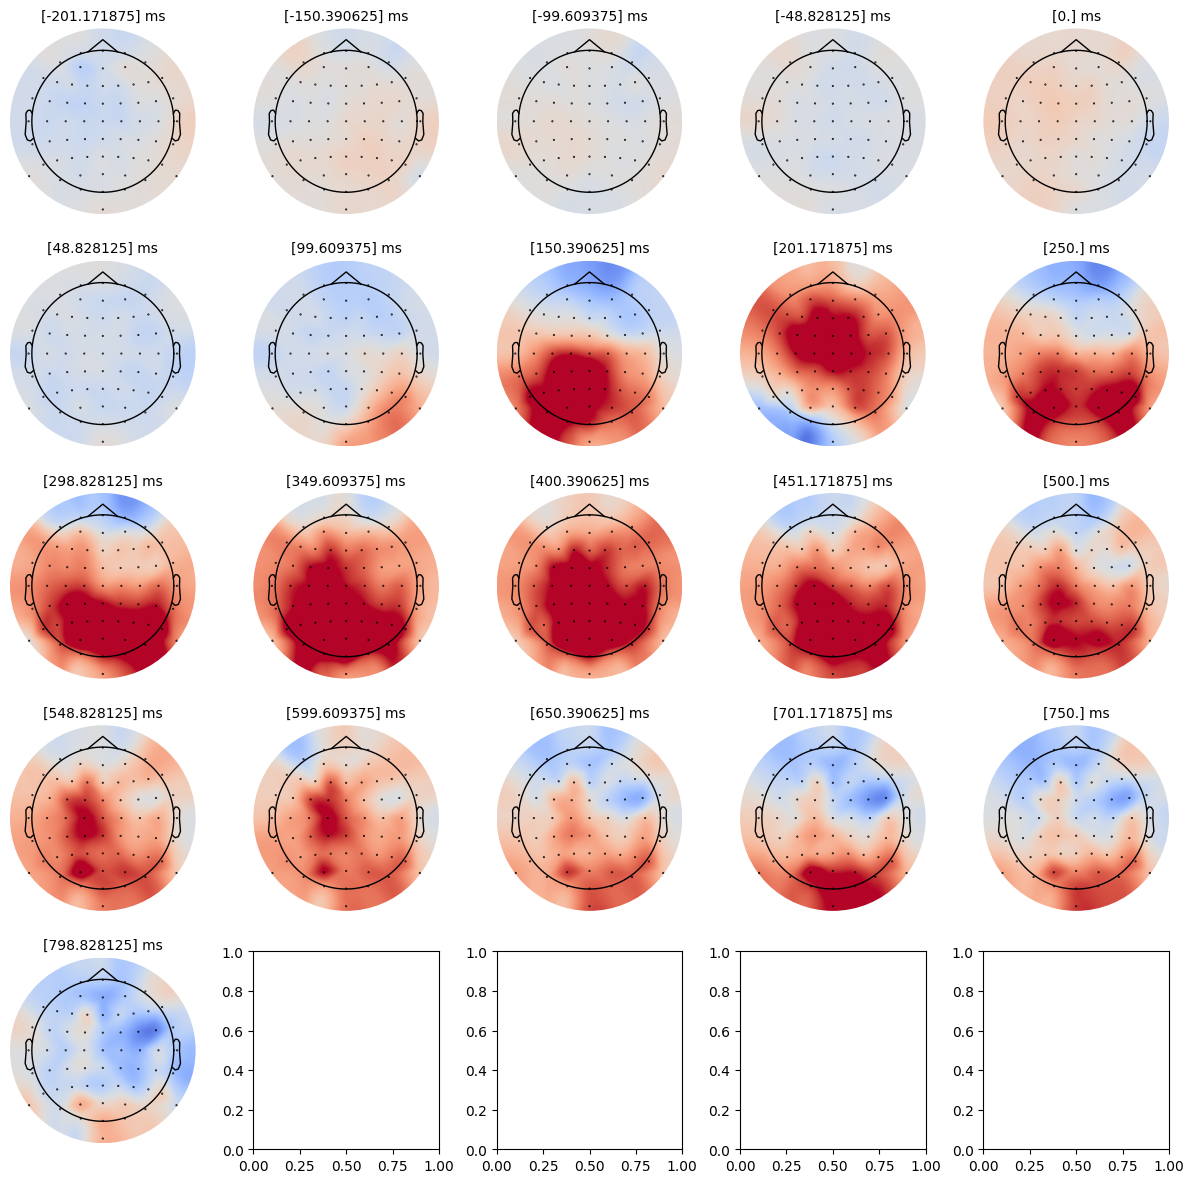

In [30]:
# topoplot time series at average around time point
twin = 10

start = np.zeros(len(time2plot))
end = np.zeros(len(time2plot))
for i in range(len(time2plot)):
    start[i] = np.argmin(np.abs(eeg.eegtimes - time2plot[i] + twin))
    end[i] = np.argmin(np.abs(eeg.eegtimes - time2plot[i] - twin))

fig, ax = plt.subplots(5, 5, figsize=(12,12))
ax = ax.flatten()

for i in range(len(time2plot)):
    topo_plot3(eeg, int(start[i]), int(end[i]), ax[i])

plt.tight_layout()
plt.show()

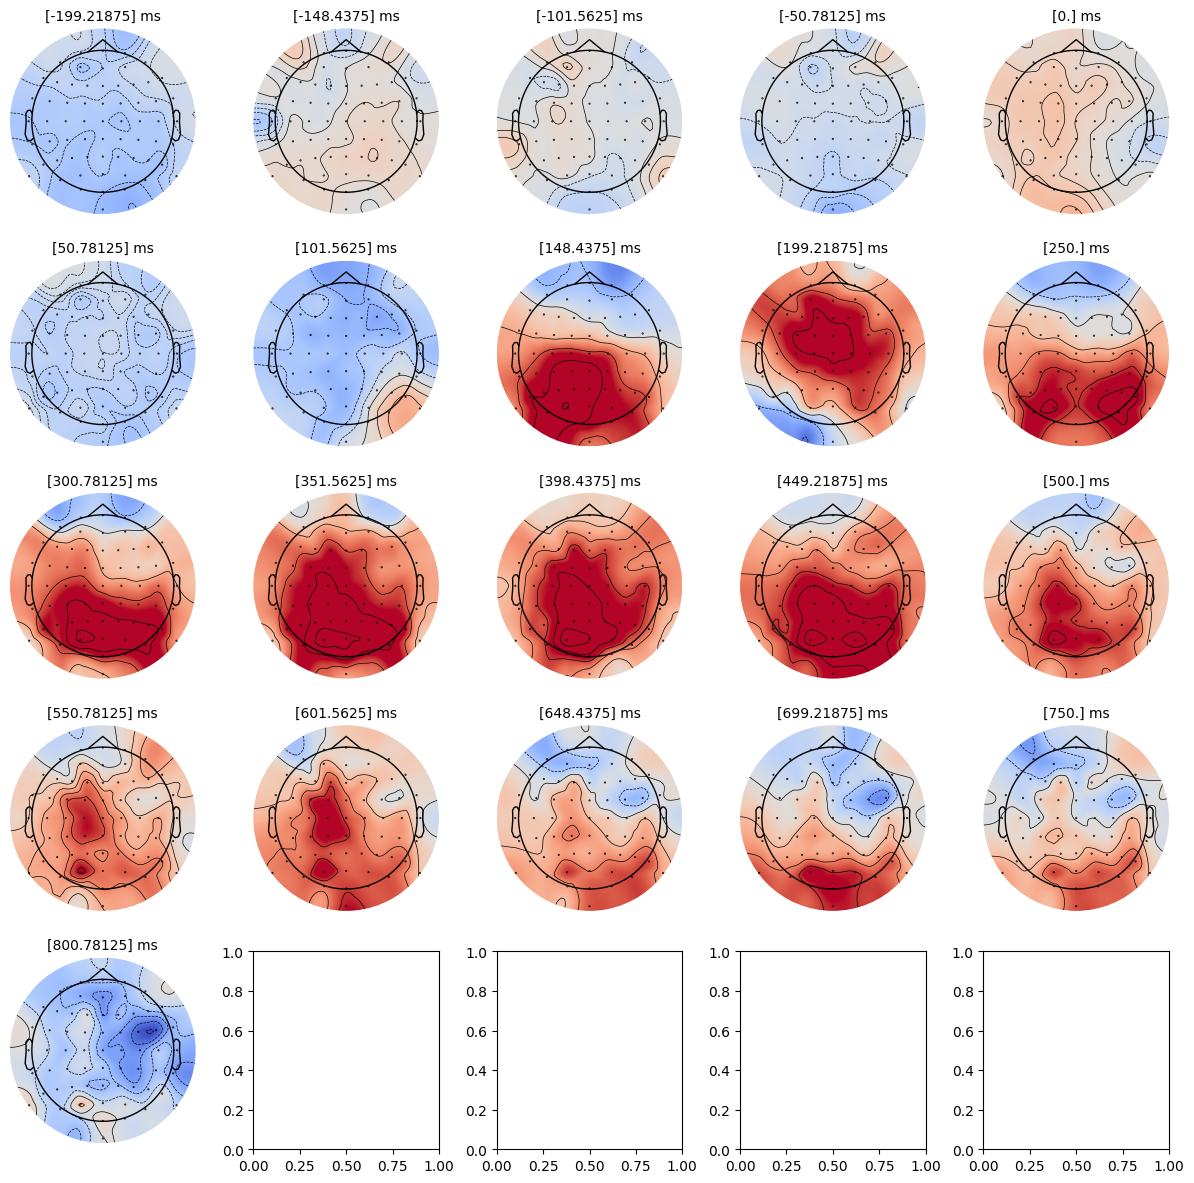